In [1]:
import numpy as np
import pandas as pd
import sklearn

We are using the **boston house pricing** dataset available in the sklearn library itself

In [2]:
from sklearn.datasets import load_boston
df = load_boston()

In [4]:
df.keys()  #returns all the keys of dataset dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
print(df.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Now we convert our dataset into pandas dataframes, so that it becomes easier to analyse the data

In [12]:
boston=pd.DataFrame(df.data,columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Adding a new column of target values to the dataframe

In [14]:
boston['PREDICT PRICE']=df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PREDICT PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


Check of there are any null values or not

In [15]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PREDICT PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


*isnull* returns 'True' or 'False' for each of the cell in the dataframe,but we cant explore all the cells to look for a True value if there's any, so we use *sum()* function to count all the cells with True value.

In [16]:
boston.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
PREDICT PRICE    0
dtype: int64

We never train the model on all the data that we have, we always make sure to atleast have a test dataset, which is different from the training dataset. 

In [17]:
from sklearn.model_selection import train_test_split

X = boston.drop('PREDICT PRICE', axis=1)    #creating a copy and then deleting the predict price column
#axis=1 is to delete a column
Y = boston['PREDICT PRICE']   #created another variable that only contains predict price column

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#.shape gives us the total no of columns and rows in that dataframe

(430, 14)
(76, 14)
(430,)
(76,)


Now implementing LINEAR REGRESSION model from sklearn & train it on the training dataset

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
## fitting model on the training dataset

lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_train_predict = lin_model.predict(X_train)
#this variable predicts the values given by X_train using the ml lin_model
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#calculates the mean square error

print("The model performance for training set")
print("RMSE is {}".format(rmse))
print("\n")

#on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("RMSE is {}".format(rmse))
print("\n")

The model performance for training set
RMSE is 2.3709191677876552e-14


The model performance for testing set
RMSE is 2.3355439547626242e-14




now visualising the data using **matplotlib**

Text(0, 0.5, 'Predicted')

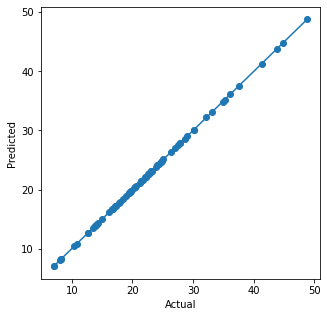

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_test_predict)
plt.plot([min(y_test_predict), max(y_test_predict)], [min(y_test_predict), max(y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('Predicted')